# Description
In this notebook we fit the biomass/backscatter calibration model.

In [1]:
import numpy
import pandas
from matplotlib import pyplot
import pathlib

import calibr8

import models

DP_RAW = pathlib.Path("raw_data")
DP_PROCESSED = pathlib.Path("processed")

In [2]:
df_data = pandas.read_excel(DP_PROCESSED / "biomass_calibration_data.xlsx", index_col=0)
df_data

,runid,independent,dependent
data_point,,,
0,7MFD4H,25.785417,58.26
1,7MFD4H,25.785417,58.00
2,7MFD4H,25.785417,57.66
3,7MFD4H,25.785417,57.63
4,7MFD4H,25.785417,57.02
...,...,...,...
475,7N3HF5,0.017393,1.45
476,7N3HF5,0.017393,1.42
477,7N3HF5,0.017393,1.44


### Fit the calibration model

In [3]:
model = models.BLProCDWBackscatterModelV1()
model.theta_names

('L_L', 'L_U', 'log_I_x', 'S', 'c', 'scale_0', 'scale_1', 'df')

Parameter df (30.0) is close to its upper bound (30).
Fit of BLProCDWBackscatterModelV1 has failed:
      fun: -85.04036146164462
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00733991,  0.01936938,  0.05886847, -0.01850678, -0.00485585,
        0.00259206, -0.01331983, -0.09868443])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 783
      nit: 69
     njev: 87
   status: 0
  success: True
        x: array([1.49137118e+00, 3.99913565e+02, 1.91574023e+00, 5.00069156e+02,
       7.43088790e-01, 1.58955730e-01, 7.20937398e-03, 3.00000000e+01])


(<Figure size 1680x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='X', ylabel='BS'>,
        <AxesSubplot:xlabel='X', ylabel='BS'>,
        <AxesSubplot:xlabel='X', ylabel='residuals'>], dtype=object))

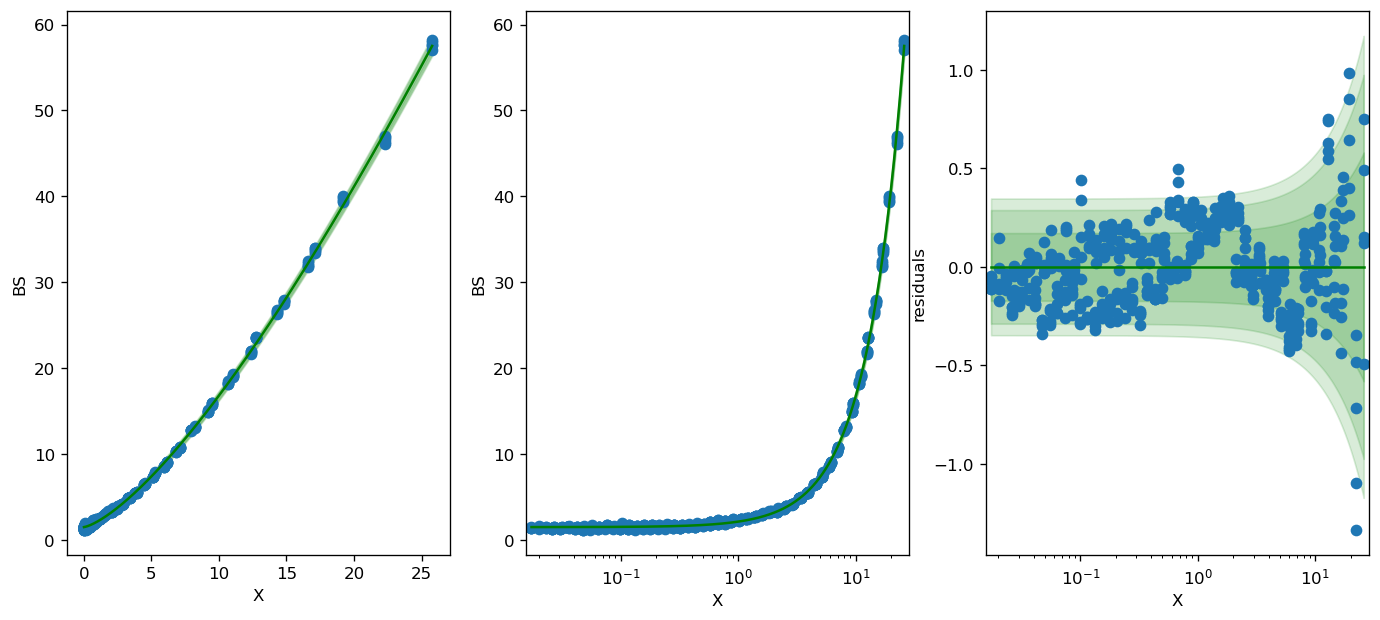

In [4]:
theta_fit, history = calibr8.fit_scipy(
    model,
    # pool the calibration data from all runs:
    independent=df_data.independent.values,
    dependent=df_data.dependent.values,
    theta_guess=[1.5, 400, 2, 500, 1, 0.2, 0.01, 3],
    theta_bounds=[
        (-numpy.inf, 5),
        (60, numpy.inf),
        (-4, 4),
        (100, 1000),
        (-5, 5),
        (0.001, 10),
        (0, 1),
        (1, 30),
    ],
)
model.save(DP_PROCESSED / "biomass.json")
calibr8.plot_model(model)
# NOTE: The `df` hitting the upper limit is just an indication that the outcome distribution is flat-tailed.
#       At `df=30` the distribution is already close to the Normal, but still has the useful properties of
#       not going `nan` at extreme values.

In [5]:
%load_ext watermark
%watermark

Last updated: 2021-05-05T18:23:18.266130+02:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

